In [1]:
from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import platform

In [2]:
for i in range(10):
    with open('all_lyric.txt','a',encoding='utf-8') as f:
        with open(f'lyric{2010+i}.txt','r',encoding='utf-8') as r:
            f.write(r.read())

[('사랑', 4796), ('우리', 1720), ('그대', 1580), ('없어', 1284), ('마음', 1172), ('사람', 1128), ('눈물', 1080), ('다시', 1080), ('지금', 1012), ('없는', 1004), ('오늘', 988), ('시간', 984), ('생각', 980), ('이제', 908), ('가슴', 800), ('모든', 764), ('모두', 752), ('하나', 748), ('보고', 712), ('같아', 704), ('정말', 684), ('같은', 672), ('있어', 648), ('혼자', 644), ('자꾸', 624), ('그래', 608), ('세상', 600), ('하루', 592), ('매일', 572), ('남자', 564), ('순간', 552), ('그냥', 532), ('해도', 520), ('기억', 516), ('우린', 512), ('노래', 508), ('모습', 500), ('소리', 496), ('있는', 496), ('그런', 484), ('그때', 484), ('좋아', 480), ('어떻게', 476), ('다른', 472), ('조금', 468), ('어디', 468), ('제발', 464), ('나나', 464), ('하늘', 448), ('아무', 440)]


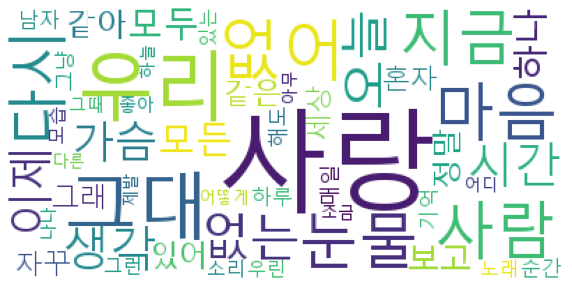

In [4]:
text=open('all_lyric.txt',encoding='utf-8').read()

okt=Okt()

# okt함수를 통해 읽어 들인 내용의 형태소를 분석한다.
sentences_tag = []
sentences_tag = okt.pos(text)
noun_adj_list = []

# tag가 명사이거나 형용사인 단어들만 noun_adj_list에 넣어줌
for word, tag in sentences_tag:
    if tag in ['Noun' , 'Adjective']:
        if len(word)!=1:
            noun_adj_list.append(word)
        
# 가장 많이 나온 단어부터 50개 저장
counts = Counter(noun_adj_list)         # 리스트 항목의 개수를 딕셔너리 형태로 리턴
tags = counts.most_common(50)           # most_common(n): 가장 많은 수를 가지는항목 n개 반환
print(tags)

# wc 한글 글꼴
if platform.system() == 'Windows':
    path = r'c:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin': # Mac OS
    path = r'/System/Library/Fonts/AppleGothic'
else:
    path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
    
# WordCloud를 생성
wc = WordCloud(font_path=path, background_color="white", max_font_size=80) # 가장 빈도 높은 단어 크기   
cloud = wc.generate_from_frequencies(dict(tags))

# 생성된 WordCloud를 test.jpg로 저장
#cloud.to_file('test.jpg')

plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

[('you', 38636), ('내가', 25480), ('me', 25116), ('너를', 23504), ('너의', 21528), ('나를', 20384), ('너무', 18564), ('it', 18512), ('my', 17524), ('oh', 16848), ('없어', 16276), ('나는', 15964), ('우리', 15080), ('나의', 14144), ('love', 14144), ('the', 13988), ('다시', 13780), ('네가', 12948), ('니가', 12688), ('없는', 12480), ('Oh', 12168), ('baby', 12116), ('내게', 11960), ('know', 10816), ('You', 10192), ('to', 10088), ('이렇게', 9984), ('지금', 9880), ('so', 9776), ('않아', 9256)]


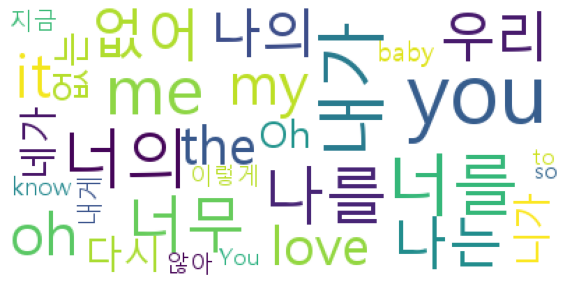

In [6]:
result = []
for word in text.split():  # 50곡의 가사를 처음부터 한곡씩 꺼내어서 작업한다.
    
    # 특수문자 제거
    special_chr = ["‘", "’", "!",  ",", ".", "(", ")", "?", "&", "'", "\”", "\"", "~"]
    for char in special_chr:
        word = str(word).replace(char, " " )

    # 공백을 기준으로 문자열 나누기
    
        if word != "":  # 공백("")이 아닐 경우에만 해당 조건문을 수행한다.
            if len(word)>1:
                    result.append(word)    # 최종적으로 result 변수에 분류된 가사들을 넣는다.




# open으로 txt파일을 열고 read()를 이용하여 읽는다.
#     text = open('test.txt', encoding='utf-8').read()
#     okt = Okt() # Open Korean Text 객체 생성

#     # okt함수를 통해 읽어들인 내용의 형태소를 분석한다.
#     sentences_tag = []
#     sentences_tag = okt.pos(text)

#     noun_adj_list = []
#     # tag가 명사이거나 형용사인 단어들만 noun_adj_list에 넣어준다.
#     for word, tag in sentences_tag:
#         if tag in ['Noun' , 'Adjective']:
#             noun_adj_list.append(word)


# 가장 많이 나온 단어부터 40개를 저장한다.
counts = Counter(result)
tags = counts.most_common(30)

print(tags)
# WordCloud를 생성한다.
# 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를
# 지정해준다. (ex. '/Font/GodoM.otf')
if platform.system() == 'Windows':
    path = r'c:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin': # Mac OS
    path = r'/System/Library/Fonts/AppleGothic'
else:
    path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

wc = WordCloud(font_path=path, background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))

# 생성된 WordCloud를 test.jpg로 보낸다.
#cloud.to_file('test.jpg')

plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()